-----------------
## *Context*
--------------------

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day. 

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. 

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it. 

------------------
## *Objective*
------------------

To extract actionable insights around demand patterns across various factors.

-----------------------------
## *Key Questions*
-----------------------------

1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

------------------------------------
## *Dataset Description*
------------------------------------

The data contains information about the weather, location, and pickups.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (1 hour)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

In [4]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [13]:
# loading the data

df = pd.read_csv("uber.csv")
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


#### observation
1. the holiday are in categorical data
2. the weather vairables are numerical
3. pickup datas has both time and date
4. the borough contains name of where  the pickup is made
5. data start from January 1st, 2015
6. we have 6 months worth of data to analyze
7. 29,101 rowa and 13 columns

In [11]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [13]:
# checking the rows and columns
df.shape

(29101, 13)

In [6]:
# checking data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [7]:
# checking for missing data
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [17]:
# statistical summary of numerical
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


In [18]:
# statistical summary of non-numerical
df.describe(exclude="number")

,pickup_dt,borough,hday
count,29101,26058,29101
unique,4343,6,2
top,2015-01-01 01:00:00,Bronx,N
freq,7,4343,27980


In [19]:
# checking unique values
df["hday"].unique()

array(['Y', 'N'], dtype=object)

In [21]:
df["borough"].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [22]:
# number of unique values for each location
df["borough"].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64

In [23]:
# trip during holiday vs non holiday
df["hday"].value_counts()

hday
N    27980
Y     1121
Name: count, dtype: int64

In [28]:
# converting pickup date to datetime using pandas
df["pickup_dt"] = pd.to_datetime(df["pickup_dt"])
df["pickup_dt"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [9]:
# conversion
df.pickup_dt = pd.to_datetime(df.pickup_dt)

# extracting month, day, time
df["day_name"] = df.pickup_dt.dt.day_name()
df["month_name"] = df.pickup_dt.dt.month_name()
df["start_hour"] = df.pickup_dt.dt.hour
df["day"] = df.pickup_dt.dt.day
df["year"] = df.pickup_dt.dt.year

In [34]:
# removing pickup_date column
df = df.drop("pickup_dt", axis=1)
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,day_name,month_name,start_hour,day,year
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015


In [35]:
# handling missing data in borough

df["borough"].value_counts(normalize=True,dropna=False)

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: proportion, dtype: float64

##### observation
1. the borough have the same numbers of values
2. the missing values is close to each value under berough

In [37]:
# change missing values to unknown
df["borough"] = df["borough"].fillna("unknown")
df["borough"].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
unknown          3043
Name: count, dtype: int64

In [39]:
# check missing values again
df.isnull().sum()

borough       0
pickups       0
spd           0
vsb           0
temp          0
dewp          0
slp           0
pcp01         0
pcp06         0
pcp24         0
sd            0
hday          0
day_name      0
month_name    0
start_hour    0
day           0
year          0
dtype: int64

<Axes: xlabel='hday', ylabel='count'>

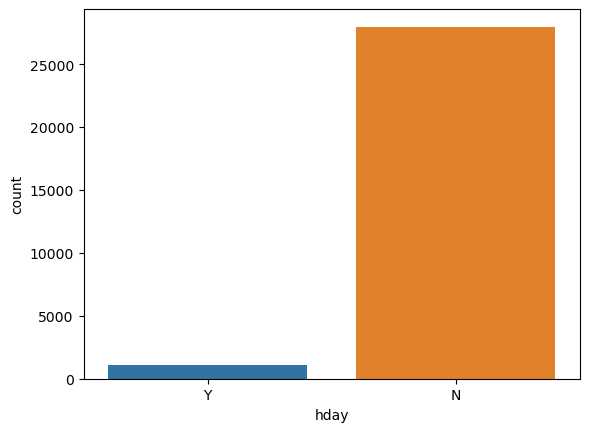

In [40]:
# plotting total of trip on holidy versus non holiday
# this is a univaraite analysis - using one parameter to plot
sns.countplot(df, x="hday")

In [46]:
# multivariate analysis
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01',
       'pcp06', 'pcp24', 'sd'] 
corr = df[num_var].corr()
corr

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054857,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.294548,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.023981,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054857,-0.294548,0.023981,1.000000,0.896665,-0.224439,-0.012767,-0.037722,-0.014382,-0.548750
dewp,0.033456,-0.321730,-0.232188,0.896665,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.015011,-0.091698,0.165451,-0.224439,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,0.004406,-0.000250,-0.487121,-0.012767,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,-0.002909,0.016266,-0.117681,-0.037722,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.020219,-0.010563,0.000323,-0.014382,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,-0.008241,0.097919,-0.048110,-0.548750,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


##### observation
1. weather variables does not affect pickup

<Axes: >

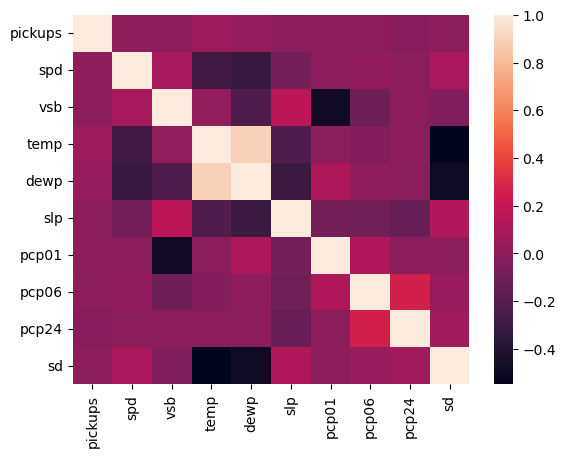

In [53]:
sns.heatmap(corr)

<Axes: >

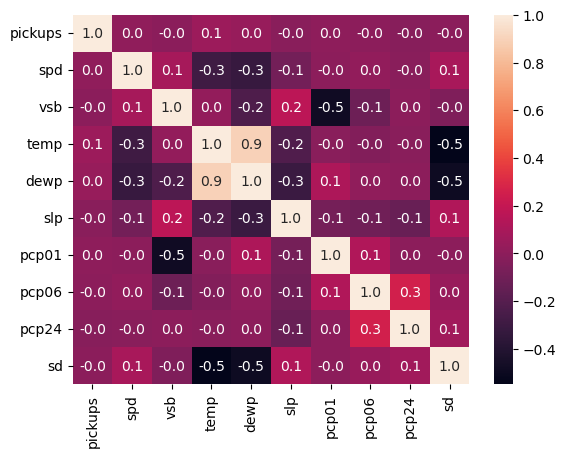

In [52]:
sns.heatmap(corr, annot=True, fmt = ".1f")

##### observation
1. weather variables does not affect pickup

In [55]:
# pickup across the month
months = df.month_name.unique().tolist()

['January', 'February', 'March', 'April', 'May', 'June']

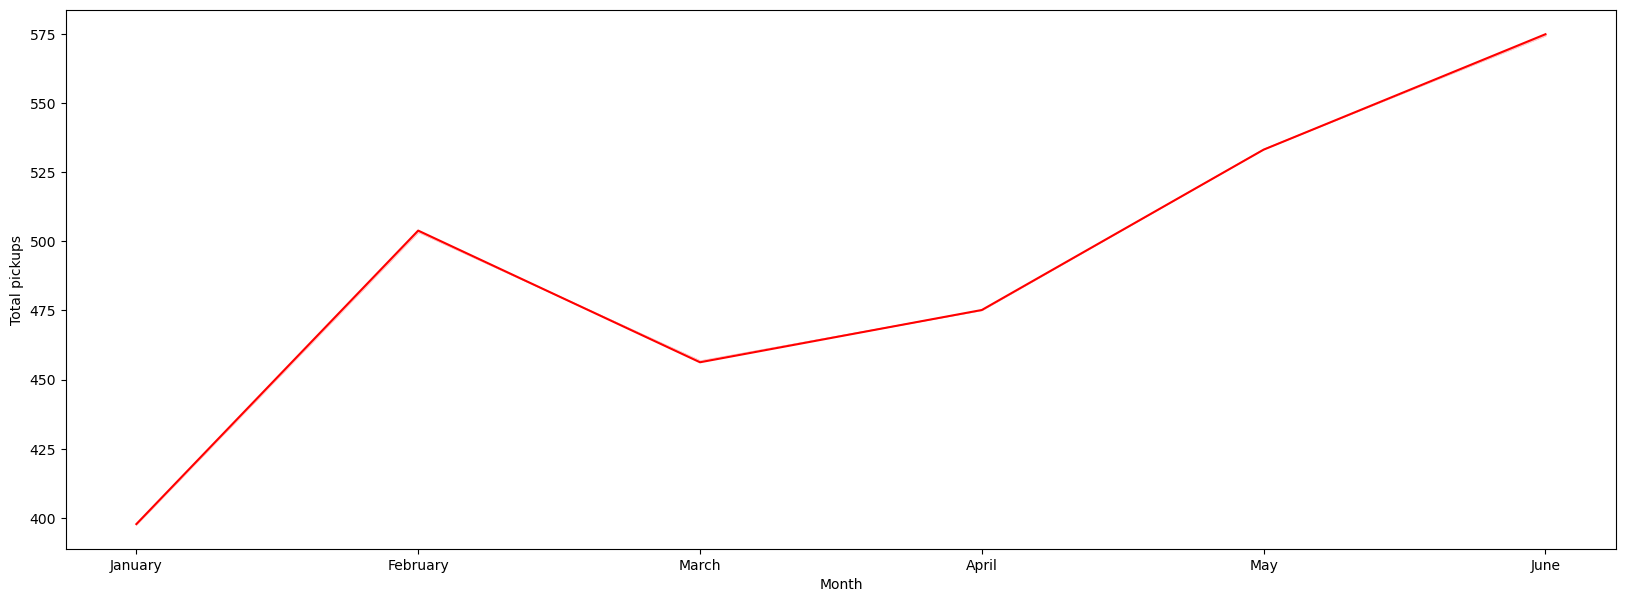

In [57]:
# months = df.month_name.unique().tolist()
# month_trend = pd
plt.figure(figsize=(20,7))
sns.lineplot(df, x="month_name", y="pickups", color="red", ci=0)
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

#### observation
1. 

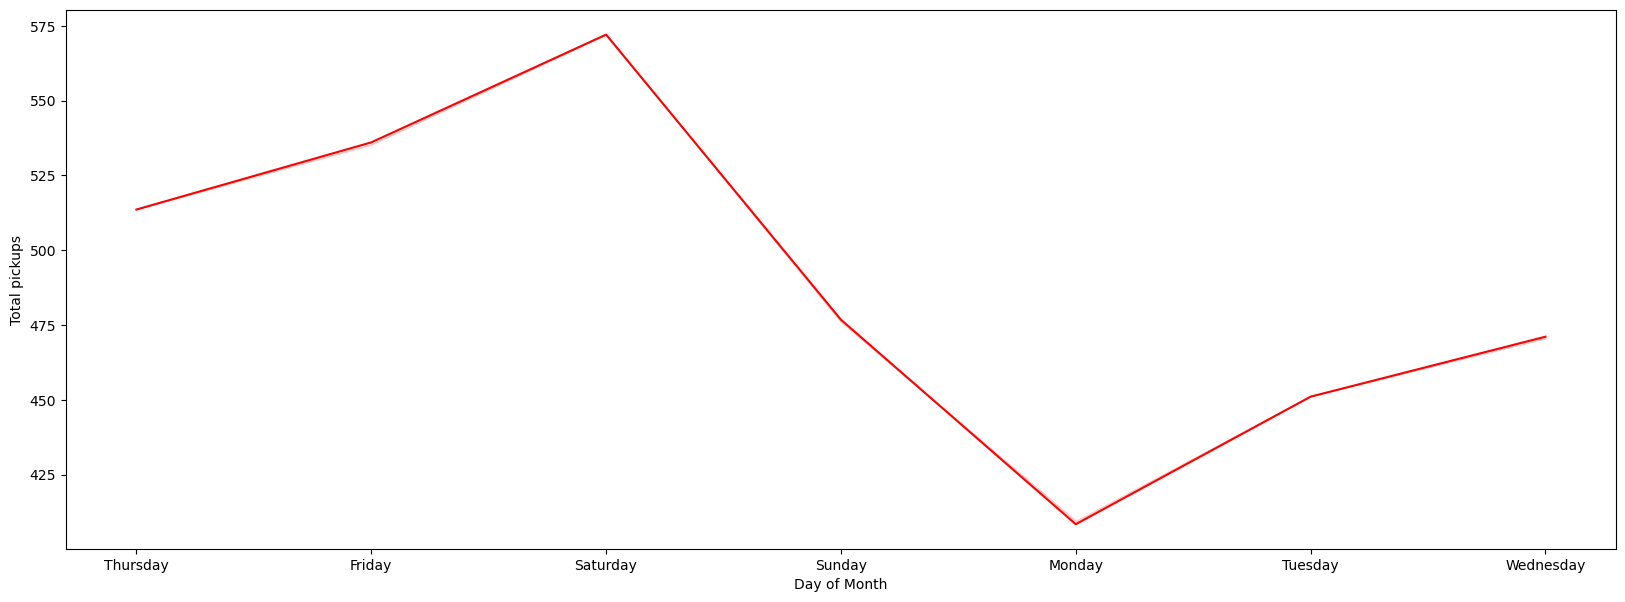

In [58]:
# pickup across the day
plt.figure(figsize=(20,7))
sns.lineplot(df, x="day_name", y="pickups", color="red", ci=0)
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

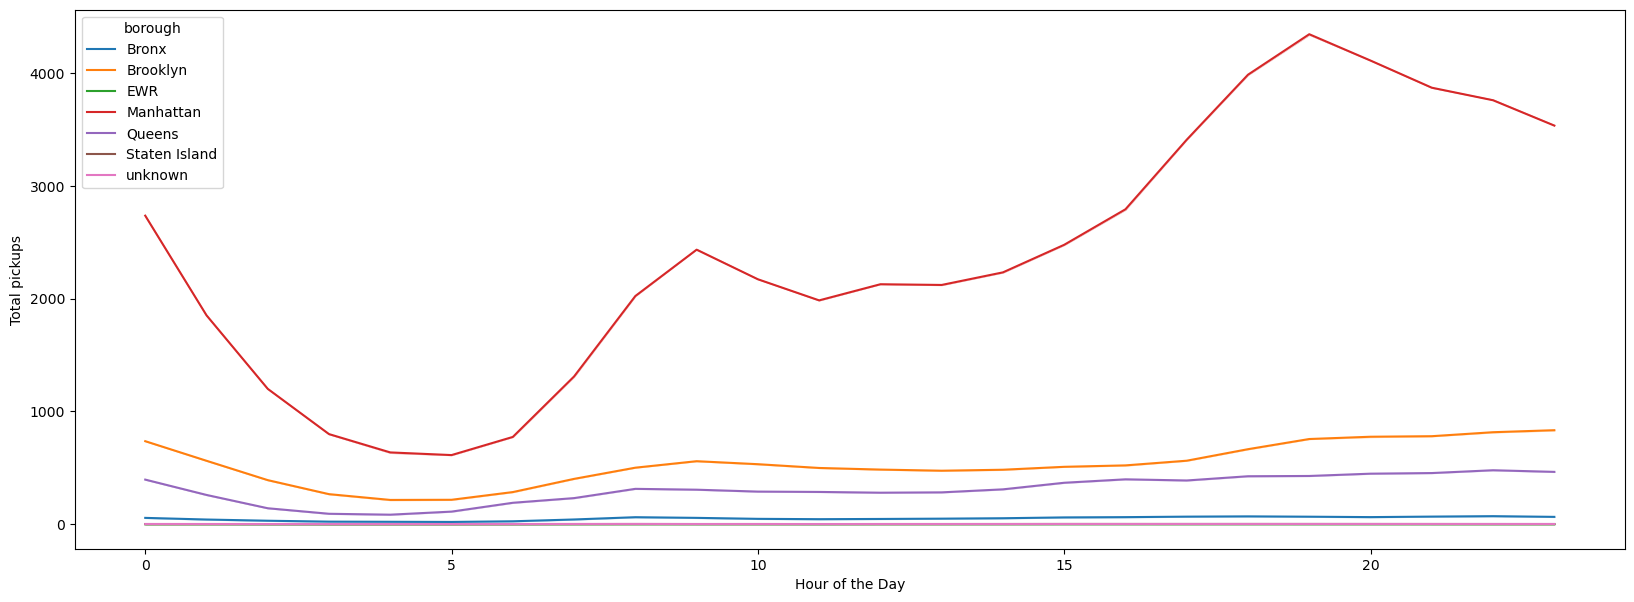

In [61]:
# pickup hour of the day across different borough
plt.figure(figsize=(20,7))
sns.lineplot(df, x="start_hour", y="pickups", color="red", ci=0, hue="borough")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the Day')
plt.show()

##### observation
1. there are lesser order from the hours of 12AM to 5AM
2. there is an increase in order from the hours of 5AM to 11:59PM

-----------------------------------------------------------------
### *Conclusion*
-----------------------------------------------------------------

We analyzed a dataset of nearly 30K hourly Uber pickup information, from New York boroughs.
The data spanned every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups. 
From an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus, we determined the factors that affect pickup and the nature of their effect.

We have been able to conclude that: 

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Uber has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends in comparison to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. We can also conclude that people use Uber for regular office commutes. The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM.
7. We need to further investigate the low demand for Uber on Mondays.

--------------------------------------------------
### *Recommendation to business*
--------------------------------------------------

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential. 
2. There has been a gradual increase in Uber rides over the last few months, and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times.
4. The demand for cabs is the highest on Saturday nights. Cab availability must be ensured during this time of the week.
5. Procure data for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.

---------------------------------
###  *Further Analysis*
---------------------------------
1. Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days.
2. Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights.